Analysis of Goalkeeper Shot-stopping Quality Using FBref/Opta Data (2021-22 to 2023-24 Seasons, Top 5 Leagues)

In [1]:
# Imports
import lxml
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Pull data and save

# 3 seasons' worth of advanced goalkeeping statistics
url_2122 = 'https://fbref.com/en/comps/Big5/2021-2022/keepersadv/players/2021-2022-Big-5-European-Leagues-Stats'
url_2223 = 'https://fbref.com/en/comps/Big5/2022-2023/keepersadv/players/2022-2023-Big-5-European-Leagues-Stats'
url_2324 = 'https://fbref.com/en/comps/Big5/keepersadv/players/Big-5-European-Leagues-Stats'

df_url_2122 = pd.read_html(url_2122)[0]
df_url_2223 = pd.read_html(url_2223)[0]
df_url_2324 = pd.read_html(url_2324)[0]

df_url_2122.head()

Unnamed: 0_level_0  Unnamed: 1_level_0 Unnamed: 2_level_0  \
                  Rk              Player             Nation   
0                  1  Julen Agirrezabala             es ESP   
1                  2       Doğan Alemdar             tr TUR   
2                  3             Alisson             br BRA   
3                  4     Alphonse Areola             fr FRA   
4                  5   Kepa Arrizabalaga             es ESP   

  Unnamed: 3_level_0 Unnamed: 4_level_0  Unnamed: 5_level_0  \
                 Pos              Squad                Comp   
0                 GK      Athletic Club          es La Liga   
1                 GK             Rennes          fr Ligue 1   
2                 GK          Liverpool  eng Premier League   
3                 GK           West Ham  eng Premier League   
4                 GK            Chelsea  eng Premier League   

  Unnamed: 6_level_0 Unnamed: 7_level_0 Unnamed: 8_level_0 Goals  ...  \
                 Age               Born                90s    GA  ...   
0                 20               2000                4.0     5  ...   
1                 18               2002               12.0    13  ...   
2                 28               1992               36.0    24  ...   
3                 28               1993                1.0     1  ...   
4                 26               1994                4.0     2  ...   

  Goal Kicks                Crosses          Sweeper                  \
         Att Launch% AvgLen     Opp Stp Stp%    #OPA #OPA/90 AvgDist   
0         26    46.2   36.0      48   1  2.1       6    1.50    17.5   
1         70    84.3   54.9     146   8  5.5      24    2.00    19.1   
2        172    33.1   33.4     340  22  6.5      89    2.47    18.7   
3         14    71.4   48.5      15   1  6.7       0    0.00     5.5   
4         21    28.6   27.6      44   2  4.5       8    2.00    18.8   

  Unnamed: 34_level_0  
              Matches  
0             Matches  
1             Matches  
2             Matches  
3             Matches  
4             Matches  

[5 rows x 35 columns]

In [2]:
df_url_2223.head()

Unnamed: 0_level_0  Unnamed: 1_level_0 Unnamed: 2_level_0  \
                  Rk              Player             Nation   
0                  1       Álvaro Aceves             es ESP   
1                  2  Julen Agirrezabala             es ESP   
2                  3       Doğan Alemdar             tr TUR   
3                  4             Alisson             br BRA   
4                  5     Alphonse Areola             fr FRA   

  Unnamed: 3_level_0 Unnamed: 4_level_0  Unnamed: 5_level_0  \
                 Pos              Squad                Comp   
0                 GK         Valladolid          es La Liga   
1                 GK      Athletic Club          es La Liga   
2                 GK             Rennes          fr Ligue 1   
3                 GK          Liverpool  eng Premier League   
4                 GK           West Ham  eng Premier League   

  Unnamed: 6_level_0 Unnamed: 7_level_0 Unnamed: 8_level_0 Goals  ...  \
                 Age               Born                90s    GA  ...   
0                 19               2003                0.1     0  ...   
1                 21               2000                7.5     6  ...   
2                 19               2002                4.5     8  ...   
3                 29               1992               37.0    43  ...   
4                 29               1993                3.4     7  ...   

  Goal Kicks                Crosses           Sweeper                  \
         Att Launch% AvgLen     Opp Stp  Stp%    #OPA #OPA/90 AvgDist   
0          1     0.0   24.0       1   0   0.0       2   13.85    33.0   
1         62    77.4   55.4      96  11  11.5      10    1.33    15.4   
2         35    71.4   51.4      75   5   6.7       5    1.11    14.8   
3        193    26.9   31.3     397  23   5.8      89    2.41    19.8   
4         30    43.3   33.0      47   2   4.3       1    0.29    10.3   

  Unnamed: 34_level_0  
              Matches  
0             Matches  
1             Matches  
2             Matches  
3             Matches  
4             Matches  

[5 rows x 35 columns]

In [3]:
df_url_2324.head()

Unnamed: 0_level_0  Unnamed: 1_level_0 Unnamed: 2_level_0  \
                  Rk              Player             Nation   
0                  1  Julen Agirrezabala             es ESP   
1                  2             Alisson             br BRA   
2                  3     Alphonse Areola             fr FRA   
3                  4       Simone Aresti             it ITA   
4                  5   Kepa Arrizabalaga             es ESP   

  Unnamed: 3_level_0 Unnamed: 4_level_0  Unnamed: 5_level_0  \
                 Pos              Squad                Comp   
0                 GK      Athletic Club          es La Liga   
1                 GK          Liverpool  eng Premier League   
2                 GK           West Ham  eng Premier League   
3                 GK           Cagliari          it Serie A   
4                 GK        Real Madrid          es La Liga   

  Unnamed: 6_level_0 Unnamed: 7_level_0 Unnamed: 8_level_0 Goals  ...  \
                 Age               Born                90s    GA  ...   
0                 22               2000                2.6     4  ...   
1                 30               1992               28.0    30  ...   
2                 30               1993               30.0    53  ...   
3                 37               1986                0.0     1  ...   
4                 28               1994               13.3     9  ...   

  Goal Kicks                Crosses          Sweeper                  \
         Att Launch% AvgLen     Opp Stp Stp%    #OPA #OPA/90 AvgDist   
0         22    95.5   64.5      41   2  4.9       3    1.13    15.3   
1        116    33.6   33.3     299  13  4.3      33    1.18    17.7   
2        219    67.6   47.3     468  27  5.8       7    0.23     8.9   
3          0     NaN    NaN       3   0  0.0       0    0.00     NaN   
4         70    25.7   30.6     157   6  3.8      10    0.75    14.7   

  Unnamed: 34_level_0  
              Matches  
0             Matches  
1             Matches  
2             Matches  
3             Matches  
4             Matches  

[5 rows x 35 columns]

In [4]:
# Begin cleaning

# Merge multi-columns
df1 = df_url_2122.copy()
df2 = df_url_2223.copy()
df3 = df_url_2324.copy()

df1.columns = [' '.join(col).strip() for col in df1.columns]
df2.columns = [' '.join(col).strip() for col in df2.columns]
df3.columns = [' '.join(col).strip() for col in df3.columns]

# validate
df1.info()
df1.head()
df2.info()
df2.head()
df3.info()
df3.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 226 entries, 0 to 225
Data columns (total 35 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Unnamed: 0_level_0 Rk        226 non-null    object
 1   Unnamed: 1_level_0 Player    226 non-null    object
 2   Unnamed: 2_level_0 Nation    226 non-null    object
 3   Unnamed: 3_level_0 Pos       226 non-null    object
 4   Unnamed: 4_level_0 Squad     226 non-null    object
 5   Unnamed: 5_level_0 Comp      226 non-null    object
 6   Unnamed: 6_level_0 Age       226 non-null    object
 7   Unnamed: 7_level_0 Born      226 non-null    object
 8   Unnamed: 8_level_0 90s       226 non-null    object
 9   Goals GA                     226 non-null    object
 10  Goals PKA                    226 non-null    object
 11  Goals FK                     226 non-null    object
 12  Goals CK                     226 non-null    object
 13  Goals OG                     226 no

,Unnamed: 0_level_0 Rk,Unnamed: 1_level_0 Player,Unnamed: 2_level_0 Nation,Unnamed: 3_level_0 Pos,Unnamed: 4_level_0 Squad,Unnamed: 5_level_0 Comp,Unnamed: 6_level_0 Age,Unnamed: 7_level_0 Born,Unnamed: 8_level_0 90s,Goals GA,...,Goal Kicks Att,Goal Kicks Launch%,Goal Kicks AvgLen,Crosses Opp,Crosses Stp,Crosses Stp%,Sweeper #OPA,Sweeper #OPA/90,Sweeper AvgDist,Unnamed: 34_level_0 Matches
0,1,Julen Agirrezabala,es ESP,GK,Athletic Club,es La Liga,22,2000,2.6,4,...,22,95.5,64.5,41,2,4.9,3,1.13,15.3,Matches
1,2,Alisson,br BRA,GK,Liverpool,eng Premier League,30,1992,28.0,30,...,116,33.6,33.3,299,13,4.3,33,1.18,17.7,Matches
2,3,Alphonse Areola,fr FRA,GK,West Ham,eng Premier League,30,1993,30.0,53,...,219,67.6,47.3,468,27,5.8,7,0.23,8.9,Matches
3,4,Simone Aresti,it ITA,GK,Cagliari,it Serie A,37,1986,0.0,1,...,0,NaN,NaN,3,0,0.0,0,0.00,NaN,Matches
4,5,Kepa Arrizabalaga,es ESP,GK,Real Madrid,es La Liga,28,1994,13.3,9,...,70,25.7,30.6,157,6,3.8,10,0.75,14.7,Matches


In [5]:
df1.iloc[218]

Unnamed: 0_level_0 Rk                 211
Unnamed: 1_level_0 Player      Rúben Vezo
Unnamed: 2_level_0 Nation          pt POR
Unnamed: 3_level_0 Pos                 DF
Unnamed: 4_level_0 Squad          Levante
Unnamed: 5_level_0 Comp        es La Liga
Unnamed: 6_level_0 Age                 27
Unnamed: 7_level_0 Born              1994
Unnamed: 8_level_0 90s               26.9
Goals GA                                0
Goals PKA                               0
Goals FK                                0
Goals CK                                0
Goals OG                                0
Expected PSxG                         0.0
Expected PSxG/SoT                     NaN
Expected PSxG+/-                      0.0
Expected /90                         0.00
Launched Cmp                            2
Launched Att                            4
Launched Cmp%                        50.0
Passes Att (GK)                         1
Passes Thr                              0
Passes Launch%                    

In [6]:
# Select desired columns
df1.columns
df1.head()
df1 = df1[['Unnamed: 1_level_0 Player', 'Unnamed: 2_level_0 Nation', 'Unnamed: 4_level_0 Squad',
       'Unnamed: 6_level_0 Age', 'Unnamed: 8_level_0 90s', 'Goals GA', 'Goals PKA', 'Goals OG', 'Expected PSxG', 'Expected PSxG/SoT',
       'Expected PSxG+/-', 'Expected /90']]
df2 = df2[['Unnamed: 1_level_0 Player', 'Unnamed: 2_level_0 Nation', 'Unnamed: 4_level_0 Squad',
       'Unnamed: 6_level_0 Age', 'Unnamed: 8_level_0 90s', 'Goals GA', 'Goals PKA', 'Goals OG', 'Expected PSxG', 'Expected PSxG/SoT',
       'Expected PSxG+/-', 'Expected /90']]
df3 = df3[['Unnamed: 1_level_0 Player', 'Unnamed: 2_level_0 Nation', 'Unnamed: 4_level_0 Squad',
       'Unnamed: 6_level_0 Age', 'Unnamed: 8_level_0 90s', 'Goals GA', 'Goals PKA', 'Goals OG', 'Expected PSxG', 'Expected PSxG/SoT',
       'Expected PSxG+/-', 'Expected /90']]

# validate
df1.head()
df2.head()
df3.head()

df1.columns

Index(['Unnamed: 1_level_0 Player', 'Unnamed: 2_level_0 Nation',
       'Unnamed: 4_level_0 Squad', 'Unnamed: 6_level_0 Age',
       'Unnamed: 8_level_0 90s', 'Goals GA', 'Goals PKA', 'Goals OG',
       'Expected PSxG', 'Expected PSxG/SoT', 'Expected PSxG+/-',
       'Expected /90'],
      dtype='object')

In [7]:
# Edit column names
new_cols = []
for col in df1.columns:
    new_col = col.split()[-1]
    new_cols.append(new_col)
df1.columns = new_cols
df2.columns = new_cols
df3.columns = new_cols

new_names = {'PKA': 'PKallowed',
             '/90': 'PSxG+/-/90'}
           
df1 = df1.rename(columns=new_names)
df2 = df2.rename(columns=new_names)
df3 = df3.rename(columns=new_names)

# validate
df1.columns
df2.columns
df3.columns

Index(['Player', 'Nation', 'Squad', 'Age', '90s', 'GA', 'PKallowed', 'OG',
       'PSxG', 'PSxG/SoT', 'PSxG+/-', 'PSxG+/-/90'],
      dtype='object')

In [8]:
# Edit data:
# Update country codes

df1['Nation'] = df1['Nation'].str.split().str.get(1)
df2['Nation'] = df2['Nation'].str.split().str.get(1)
df3['Nation'] = df3['Nation'].str.split().str.get(1)

# validate
df1.head()
#df2.head()
#df3.head()

,Player,Nation,Squad,Age,90s,GA,PKallowed,OG,PSxG,PSxG/SoT,PSxG+/-,PSxG+/-/90
0,Julen Agirrezabala,ESP,Athletic Club,20,4.0,5,0,0,5.0,0.27,0.0,0.00
1,Doğan Alemdar,TUR,Rennes,18,12.0,13,1,0,12.3,0.29,-0.7,-0.06
2,Alisson,BRA,Liverpool,28,36.0,24,0,1,24.4,0.25,+1.4,+0.04
3,Alphonse Areola,FRA,West Ham,28,1.0,1,0,0,1.2,0.39,+0.2,+0.17
4,Kepa Arrizabalaga,ESP,Chelsea,26,4.0,2,0,0,3.2,0.25,+1.2,+0.30


In [9]:
# Check for nulls in DF1
df1.isna().sum()

# View rows containing nulls
df1.loc[df1.isna().any(axis=1)]

# Safe to remove rows where 'Nation' is NaN because that is a relic of the website encoding, not real data
# Safe to remove rows where 'PSxG/SoT' is NaN because it is a result of deviding by 0
# i.e. this players faced 0 shots. On investigation this is because they played very few minutes (see '90s')
# or for Ruben Vezo because he is actually a defender who was put in goal for a brief period of time
# because the normal goalie got either injured or red carded and no subs were available

# Removing null rows:
df1 = df1.dropna()

# validate
df1.isna().sum()

Player        0
Nation        0
Squad         0
Age           0
90s           0
GA            0
PKallowed     0
OG            0
PSxG          0
PSxG/SoT      0
PSxG+/-       0
PSxG+/-/90    0
dtype: int64

In [10]:
# Check for nulls in DF2
df2.isna().sum()

# View rows containing nulls
#df2[(df2['Nation'].isna()) | (df2['GA'].isna() | 
df2.loc[df2.isna().any(axis=1)]

# Safe to remove rows where 'Nation' is NaN because that is a relic of the website encoding, not real data
# Safe to remove rows where 'PSxG/SoT' is NaN because it is a result of deviding by 0
# i.e. this players faced 0 shots. On investigation this is because they played very few minutes (see '90s')

# Removing null rows:
df2 = df2.dropna()

# validate
df2.isna().sum()

Player        0
Nation        0
Squad         0
Age           0
90s           0
GA            0
PKallowed     0
OG            0
PSxG          0
PSxG/SoT      0
PSxG+/-       0
PSxG+/-/90    0
dtype: int64

In [11]:
# Check for nulls in DF3
df3.isna().sum()

# View rows containing nulls
#df2[(df2['Nation'].isna()) | (df2['GA'].isna() | 
df3.loc[df3.isna().any(axis=1)]

# Safe to remove rows where 'Nation' is NaN because that is a relic of the website encoding, not real data
# Safe to remove rows where 'PSxG/SoT' is NaN because it is a result of deviding by 0
# i.e. this players faced 0 shots. On investigation this is because they played very few minutes (see '90s')
# or for Tommaso Martinelli because data is missing from the original source

# Removing null rows:
df3 = df3.dropna()

# validate
df3.isna().sum()

Player        0
Nation        0
Squad         0
Age           0
90s           0
GA            0
PKallowed     0
OG            0
PSxG          0
PSxG/SoT      0
PSxG+/-       0
PSxG+/-/90    0
dtype: int64

In [12]:
# Set column types
df1 = df1.astype({'Age': int, '90s': float, 'GA': int, 'OG': int, 'PKallowed': int, 'PSxG':float, 'PSxG/SoT': float,
                          'PSxG+/-': float, 'PSxG+/-/90': float})
df2 = df2.astype({'Age': int, '90s': float, 'GA': int, 'OG': int, 'PKallowed': int, 'PSxG':float, 'PSxG/SoT': float,
                          'PSxG+/-': float, 'PSxG+/-/90': float})
df3 = df3.astype({'Age': int, '90s': float, 'GA': int, 'OG': int, 'PKallowed': int, 'PSxG':float, 'PSxG/SoT': float,
                          'PSxG+/-': float, 'PSxG+/-/90': float})
#validate
df1.info()
#df2.info()
#df3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 212 entries, 0 to 224
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Player      212 non-null    object 
 1   Nation      212 non-null    object 
 2   Squad       212 non-null    object 
 3   Age         212 non-null    int64  
 4   90s         212 non-null    float64
 5   GA          212 non-null    int64  
 6   PKallowed   212 non-null    int64  
 7   OG          212 non-null    int64  
 8   PSxG        212 non-null    float64
 9   PSxG/SoT    212 non-null    float64
 10  PSxG+/-     212 non-null    float64
 11  PSxG+/-/90  212 non-null    float64
dtypes: float64(5), int64(4), object(3)
memory usage: 21.5+ KB


In [13]:
# Update GA to GA - OG

# Per the data source, derivative stats are calculated ignoring OG (own goals)
df1['GA'] = df1['GA'] - df1['OG']
df2['GA'] = df2['GA'] - df2['OG']
df3['GA'] = df3['GA'] - df3['OG']

df1 = df1.drop(columns='OG')
df2 = df2.drop(columns='OG')
df3 = df3.drop(columns='OG')

#validate
df1.head()

,Player,Nation,Squad,Age,90s,GA,PKallowed,PSxG,PSxG/SoT,PSxG+/-,PSxG+/-/90
0,Julen Agirrezabala,ESP,Athletic Club,20,4.0,5,0,5.0,0.27,0.0,0.00
1,Doğan Alemdar,TUR,Rennes,18,12.0,13,1,12.3,0.29,-0.7,-0.06
2,Alisson,BRA,Liverpool,28,36.0,23,0,24.4,0.25,1.4,0.04
3,Alphonse Areola,FRA,West Ham,28,1.0,1,0,1.2,0.39,0.2,0.17
4,Kepa Arrizabalaga,ESP,Chelsea,26,4.0,2,0,3.2,0.25,1.2,0.30


In [14]:
# Combining data across the 3 DFs:
# Add a column for the season years
df1['Season'] = '2021-22'
df2['Season'] = '2022-23'
df3['Season'] = '2023-24'
# Add a column for the quant. of seasons represented by the row
df1['Seasons'] = 1
df2['Seasons'] = 1
df3['Seasons'] = 1


# Concatenate the 3 DFs
df_long = pd.concat([df1, df2, df3]).sort_values(['Player', 'Season']).reset_index(drop=True)
df_long.head()

# Set column types for df_long
df_long = df_long.astype({'Age': int, '90s': float, 'GA': int, 'PKallowed': int, 'PSxG':float, 'PSxG/SoT': float,
                          'PSxG+/-': float, 'PSxG+/-/90': float, 'Seasons': int})
df_long.info()


# Combine rows with matching player names, and apply per-column functions
df = pd.DataFrame()
for i in range(len(df_long)):
    # for each row in df_long, we either add  it to df or combine with an existing row in df
    # if that player already has a row in df, combine the rows
    # if it doesn't exist already in df, then append the row from df_long to df
    exists = False
    inserting_row = df_long.iloc[i]
    for j in range(len(df)):
        existing_row = df.iloc[j]
        # checking whether the player is in df already
        if ((existing_row['Player'] == inserting_row['Player']) &
            (existing_row['Nation'] == inserting_row['Nation'])):
            # combine row from df_long with existing row in df
            # different combination method used based on data type
            inserting_row_recent = inserting_row['Season'] > existing_row['Season']
            if inserting_row_recent:
                df.iloc[j, df.columns.get_loc('Squad')] = inserting_row['Squad']
                df.iloc[j, df.columns.get_loc('Age')] = inserting_row['Age']
                df.iloc[j, df.columns.get_loc('Season')] = inserting_row['Season']
            else:
                df.iloc[j, df.columns.get_loc('Squad')] = existing_row['Squad']
                df.iloc[j, df.columns.get_loc('Age')] = existing_row['Age']
                df.iloc[j, df.columns.get_loc('Season')] = existing_row['Season']
            df.iloc[j, df.columns.get_loc('90s')] = existing_row['90s'] + inserting_row['90s']
            df.iloc[j, df.columns.get_loc('GA')] = existing_row['GA'] + inserting_row['GA']
            df.iloc[j, df.columns.get_loc('PKallowed')] = existing_row['PKallowed'] + inserting_row['PKallowed']
            df.iloc[j, df.columns.get_loc('PSxG')] = existing_row['PSxG'] + inserting_row['PSxG']
            # note the below PSxG/SoT claculation is wrong. these rows cannot be combined without SoT data for each season
            # it needs to be a mean weighted by SoT, instead it is a mean weighted by '90s'
            df.iloc[j, df.columns.get_loc('PSxG/SoT')] = ((existing_row['PSxG/SoT'] * existing_row['90s']) + 
                                                          (inserting_row['PSxG/SoT'] * inserting_row['90s'])) / \
                                                         df.iloc[j, df.columns.get_loc('90s')]
            df.iloc[j, df.columns.get_loc('PSxG+/-')] = existing_row['PSxG+/-'] + inserting_row['PSxG+/-']
            df.iloc[j, df.columns.get_loc('PSxG+/-/90')] = (existing_row['PSxG+/-'] + inserting_row['PSxG+/-']) / (existing_row['90s'] + inserting_row['90s'])
            df.iloc[j, df.columns.get_loc('Seasons')] += 1
            # mark that row i from df_long already exists in df
            exists = True
            break
    # if df was iterated over and player df_long[i] doesn't exist in df, then add the player to df
    if not exists:
        df = pd.concat([df, df_long.iloc[[i]]])

df = df.reset_index(drop=True)
df = df.drop('Season', axis=1)
df.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 615 entries, 0 to 614
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Player      615 non-null    object 
 1   Nation      615 non-null    object 
 2   Squad       615 non-null    object 
 3   Age         615 non-null    int64  
 4   90s         615 non-null    float64
 5   GA          615 non-null    int64  
 6   PKallowed   615 non-null    int64  
 7   PSxG        615 non-null    float64
 8   PSxG/SoT    615 non-null    float64
 9   PSxG+/-     615 non-null    float64
 10  PSxG+/-/90  615 non-null    float64
 11  Season      615 non-null    object 
 12  Seasons     615 non-null    int64  
dtypes: float64(5), int64(4), object(4)
memory usage: 62.6+ KB


,Player,Nation,Squad,Age,90s,GA,PKallowed,PSxG,PSxG/SoT,PSxG+/-,PSxG+/-/90,Seasons
0,Aaron Ramsdale,ENG,Arsenal,25,78.0,85,8,81.9,0.269744,-3.1,-0.039744,3
1,Aarón Escandell,ESP,Las Palmas,27,4.9,9,2,6.7,0.306531,-2.3,-0.469388,2
2,Adrian Šemper,CRO,Genoa,23,1.0,1,0,0.9,0.280000,-0.1,-0.060000,1
3,Agustín Marchesín,ARG,Celta Vigo,34,19.0,28,2,20.7,0.240000,-7.3,-0.380000,1
4,Aitor Fernández,ESP,Osasuna,32,40.1,56,2,47.3,0.252768,-8.7,-0.216958,3
5,Alaa Bellaarouch,MAR,Strasbourg,21,15.0,25,3,19.8,0.250000,-5.2,-0.350000,1
6,Alban Lafont,FRA,Nantes,24,102.7,140,21,149.6,0.288286,9.6,0.093476,3
7,Alejandro Primo,ESP,Levante,17,1.0,1,0,0.8,0.410000,-0.2,-0.180000,1
8,Alessandro Berardi,ITA,Hellas Verona,30,1.0,3,0,2.3,0.380000,-0.7,-0.660000,1
9,Alessandro Russo,ITA,Sassuolo,21,1.0,3,0,2.8,0.400000,-0.2,-0.220000,1


In [15]:
df_long.head(20)

,Player,Nation,Squad,Age,90s,GA,PKallowed,PSxG,PSxG/SoT,PSxG+/-,PSxG+/-/90,Season,Seasons
0,Aaron Ramsdale,ENG,Arsenal,23,34.0,38,5,38.2,0.26,0.2,0.00,2021-22,1
1,Aaron Ramsdale,ENG,Arsenal,24,38.0,42,3,40.0,0.28,-2.0,-0.05,2022-23,1
2,Aaron Ramsdale,ENG,Arsenal,25,6.0,5,0,3.7,0.26,-1.3,-0.22,2023-24,1
3,Aarón Escandell,ESP,Granada,25,3.2,6,2,4.2,0.14,-1.8,-0.57,2021-22,1
4,Aarón Escandell,ESP,Las Palmas,27,1.7,3,0,2.5,0.62,-0.5,-0.30,2023-24,1
5,Adrian Šemper,CRO,Genoa,23,1.0,1,0,0.9,0.28,-0.1,-0.06,2021-22,1
6,Agustín Marchesín,ARG,Celta Vigo,34,19.0,28,2,20.7,0.24,-7.3,-0.38,2022-23,1
7,Aitor Fernández,ESP,Levante,30,13.0,29,1,23.5,0.27,-5.5,-0.42,2021-22,1
8,Aitor Fernández,ESP,Osasuna,31,21.0,18,0,17.7,0.24,-0.3,-0.01,2022-23,1
9,Aitor Fernández,ESP,Osasuna,32,6.1,9,1,6.1,0.26,-2.9,-0.47,2023-24,1


In [16]:
# Add column for PSxG+/- per PSxG
# (which is (PSxG - GA) / PSxG (ignoring Own Goals)
# This represents over- or under-performance in shotstopping, controlled for total shots faced, which is controlled for
# the qualiy of those shots (by using PSxG as opposed to SoT)
df['PSxG+/-/PSxG'] = df['PSxG+/-'] / df['PSxG']

# validate
#df.info()
#df.head()
df.describe()

,Age,90s,GA,PKallowed,PSxG,PSxG/SoT,PSxG+/-,PSxG+/-/90,Seasons,PSxG+/-/PSxG
count,329.000000,329.000000,329.000000,329.000000,329.000000,329.000000,329.000000,329.000000,329.000000,329.000000
mean,28.550152,32.842857,44.854103,4.112462,43.390274,0.281086,-1.457751,-0.207693,1.869301,-0.090347
std,5.177762,33.646262,43.567196,4.601444,42.985246,0.083038,5.734380,1.464766,0.861401,0.642464
min,17.000000,0.000000,0.000000,0.000000,0.100000,0.000000,-33.800000,-19.200000,1.000000,-9.000000
25%,25.000000,4.500000,9.000000,0.000000,7.500000,0.253091,-3.700000,-0.277551,1.000000,-0.169231
50%,29.000000,21.000000,29.000000,3.000000,27.800000,0.279872,-0.800000,-0.060000,2.000000,-0.045872
75%,32.000000,53.900000,75.000000,6.000000,71.500000,0.302932,0.600000,0.050000,3.000000,0.035088
max,41.000000,113.800000,180.000000,21.000000,170.500000,0.760000,16.100000,7.560000,4.000000,1.000000


In [17]:
# Visualizations
# Below is a progression of visualizations showing how looking at each derivative stat 
# reveals different GKs as being top performers.
# They are in order of least accurate to most accurate.

                Player Nation           Squad  Age   90s  GA
0         Maduka Okoye    NGA         Udinese   23  21.0  24
1         David Ospina    COL          Napoli   32  31.0  24
2         Sven Ulreich    GER   Bayern Munich   34  20.0  24
3         Alfred Gomis    SEN          Rennes   27  25.0  24
4         Manolo Reina    ESP        Mallorca   36  21.0  25
5         Andriy Lunin    UKR     Real Madrid   24  30.0  25
6         Ørjan Nyland    NOR         Sevilla   32  26.0  27
7         Elia Caprile    ITA          Empoli   21  23.0  27
8      Bart Verbruggen    NED        Brighton   20  21.0  28
9     Thomas Strakosha    ALB       Brentford   28  24.5  30
10  Ciprian Tătărușanu    ROU           Milan   36  22.0  30
11       Claudio Bravo    CHI           Betis   40  35.2  30
12        Philipp Köhn    SUI          Monaco   25  22.0  31
13        Marcin Bułka    POL            Nice   23  37.0  31
14       Etrit Berisha    ALB          Empoli   34  24.0  32
15      Fabian Bredlow  

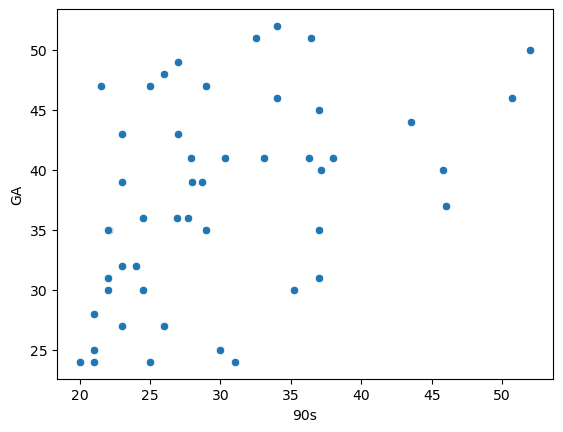

In [18]:
# GA
# Goals Allowed -- the total goals conceded by the player, less own goals.
df_GA = df.copy()

# Remove players that have not played at least 20 games
df_GA = df_GA[df_GA['90s'] >= 20]

# Select demographic data, and stat of concern: GA
df_GA = df_GA[['Player', 'Nation', 'Squad', 'Age', '90s', 'GA']]
df_GA = df_GA.sort_values(by='GA', ascending=True).reset_index(drop=True)

# Select top 50 performers
df_GA = df_GA.iloc[:50]
df_GA.head()

sns.scatterplot(x=df_GA['90s'], y=df_GA['GA'])
print(df_GA.head(20))

                  Player Nation            Squad  Age    90s  PSxG+/-
0   Gianluigi Donnarumma    ITA        Paris S-G   24   79.0     16.1
1            Brice Samba    FRA             Lens   29   70.0     13.7
2        Paulo Gazzaniga    ARG           Girona   31   66.0     13.4
3              Mory Diaw    SEN    Clermont Foot   30   67.0     12.5
4                Alisson    BRA        Liverpool   30  101.0     11.2
5   Giorgi Mamardashvili    GEO         Valencia   22   92.5     11.2
6    Michele Di Gregorio    ITA            Monza   26   68.9     11.1
7            Édgar Badía    ESP            Elche   30   60.0     10.8
8                José Sá    POR           Wolves   30  106.2     10.6
9          Stefan Ortega    GER  Manchester City   30   43.1      9.9
10          Alban Lafont    FRA           Nantes   24  102.7      9.6
11            Unai Simón    ESP    Athletic Club   26   99.9      8.6
12       Lucas Chevalier    FRA            Lille   21   65.0      8.2
13     Kepa Arrizaba

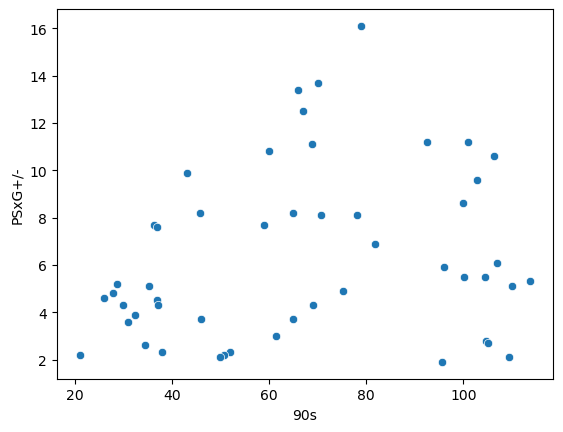

In [19]:
# PSxG+/- or PSxGD
# Post-shot Expected Goals Against -- the expected goals value of all shots on target faced, less goals conceded
# A Positive value indicates 'goals prevented', a negative value indicates 'additional goals conceded'
df_PSxGD = df.copy()

# Remove players that have not played at least 20 games
df_PSxGD = df_PSxGD[df_PSxGD['90s'] >= 20]

# Select demographic data, and stat of concern: GA
df_PSxGD = df_PSxGD[['Player', 'Nation', 'Squad', 'Age', '90s', 'PSxG+/-']]
df_PSxGD = df_PSxGD.sort_values(by='PSxG+/-', ascending=False).reset_index(drop=True)

# Select top 50 performers
df_PSxGD = df_PSxGD.iloc[:50]
df_PSxGD.head()

sns.scatterplot(x=df_PSxGD['90s'], y=df_PSxGD['PSxG+/-'])
print(df_PSxGD.head(20))

                  Player Nation            Squad  Age   90s  PSxG+/-/90
0          Stefan Ortega    GER  Manchester City   30  43.1    0.229698
1          Álvaro Vallés    ESP       Las Palmas   26  36.3    0.210000
2         Walter Benítez    ARG             Nice   28  37.0    0.210000
3   Gianluigi Donnarumma    ITA        Paris S-G   24  79.0    0.203797
4        Paulo Gazzaniga    ARG           Girona   31  66.0    0.203030
5            Brice Samba    FRA             Lens   29  70.0    0.195714
6              Mory Diaw    SEN    Clermont Foot   30  67.0    0.186567
7       Michael Zetterer    GER    Werder Bremen   28  28.7    0.181185
8            Édgar Badía    ESP            Elche   30  60.0    0.180000
9      Kepa Arrizabalaga    ESP      Real Madrid   28  45.8    0.179039
10          Ørjan Nyland    NOR          Sevilla   32  26.0    0.176923
11           Jordi Masip    ESP       Valladolid   33  27.9    0.170000
12   Michele Di Gregorio    ITA            Monza   26  68.9    0

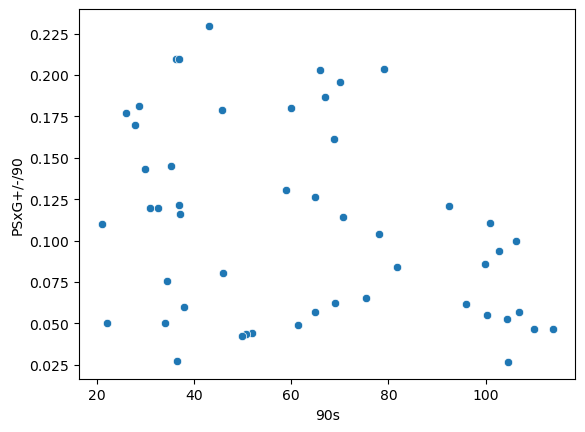

In [20]:
# PSxG+/-/90
# Post-shot Expected Goals Against per 90 -- the expected goals value of all shots on target faced, less goals conceded, per game
# A Positive value indicates 'goals prevented', a negative value indicates 'additional goals conceded'
# Scaled per game played to account for minutes played
df_PSxGD90 = df.copy()

# Remove players that have not played at least 20 games
df_PSxGD90 = df_PSxGD90[df_PSxGD90['90s'] >= 20]

# Select demographic data, and stat of concern: GA
df_PSxGD90 = df_PSxGD90[['Player', 'Nation', 'Squad', 'Age', '90s', 'PSxG+/-/90']]
df_PSxGD90 = df_PSxGD90.sort_values(by='PSxG+/-/90', ascending=False).reset_index(drop=True)

# Select top 50 performers
df_PSxGD90 = df_PSxGD90.iloc[:50]
df_PSxGD90.head()

sns.scatterplot(x=df_PSxGD90['90s'], y=df_PSxGD90['PSxG+/-/90'])
print(df_PSxGD90.head(20))

                  Player Nation            Squad  Age    90s  PSxG+/-  \
0            Brice Samba    FRA             Lens   29   70.0     13.7   
1         Walter Benítez    ARG             Nice   28   37.0      7.6   
2   Gianluigi Donnarumma    ITA        Paris S-G   24   79.0     16.1   
3      Kepa Arrizabalaga    ESP      Real Madrid   28   45.8      8.2   
4          Álvaro Vallés    ESP       Las Palmas   26   36.3      7.7   
5           Andriy Lunin    UKR      Real Madrid   24   30.0      4.3   
6           Ørjan Nyland    NOR          Sevilla   32   26.0      4.6   
7          Claudio Bravo    CHI            Betis   40   35.2      5.1   
8          Stefan Ortega    GER  Manchester City   30   43.1      9.9   
9        Paulo Gazzaniga    ARG           Girona   31   66.0     13.4   
10          David Ospina    COL           Napoli   32   31.0      3.6   
11          Marcin Bułka    POL             Nice   23   37.0      4.5   
12       Lucas Chevalier    FRA            Lille   

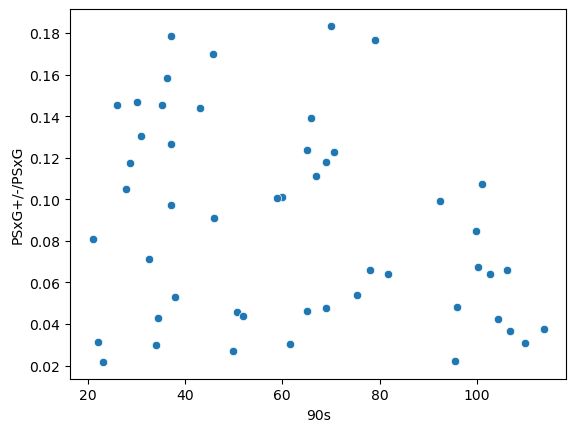

In [21]:
# PSxG+/-/PSxG
# Post-shot Expected Goals Against per 90 -- the expected goals value of all shots on target faced, less goals conceded, per PSxG faced
# A Positive value indicates a keeper more likely to save a goal faced than the average keeper
# A negative value indicates a keeper less likely to save a goal faced than the average keeper
# Scaled per PSxG faced since some keeprs face for PSxG per game than others (i.e. a good team will likely face a smaller PSxG per 90
# than a poor team)
df_PSxGDPSxG = df.copy()

# Remove players that have not played at least 20 games
df_PSxGDPSxG = df_PSxGDPSxG[df_PSxGDPSxG['90s'] >= 20]

# Select demographic data, and stat of concern: GA
df_PSxGDPSxG = df_PSxGDPSxG[['Player', 'Nation', 'Squad', 'Age', '90s', 'PSxG+/-', 'PSxG+/-/PSxG']]
df_PSxGDPSxG = df_PSxGDPSxG.sort_values(by='PSxG+/-/PSxG', ascending=False).reset_index(drop=True)

# Select top 50 performers
df_PSxGDPSxG = df_PSxGDPSxG.iloc[:50]
df_PSxGDPSxG.head()

sns.scatterplot(x=df_PSxGDPSxG['90s'], y=df_PSxGDPSxG['PSxG+/-/PSxG'])
print(df_PSxGDPSxG.head(20))

# Save results
df_PSxGDPSxG.to_csv('shot-stoppers.csv')